In [ ]:
# data
# https://www.kaggle.com/chrisfilo/fruit-recognition

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
import cv2
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical


In [ ]:
# gettiong images

In [ ]:
import os 


In [ ]:
os.listdir('/content/drive/MyDrive/диплом/data')
my_data_dir = '/content/drive/MyDrive/диплом/data'

In [ ]:
fruits_names = ['Apple','Banana','Carambola','Persimmon','Peach','muskmelon','Guava','Mango','Pear','Orange',
                'Kiwi','Pomegranate','Plum','Tomatoes','Pitaya']

In [ ]:
def load_images_from_folder(folder,only_path = False, label = ""):
# Load the paths to the images in a directory
# or load the images
    if only_path == False:
        images = []
        for filename in os.listdir(folder):
            img = plt.imread(os.path.join(folder,filename))
            if img is not None:
                images.append(img)
        return images
    else:
        path = []
        for filename in os.listdir(folder):
            img_path = os.path.join(folder,filename)
            if img_path is not None:
                path.append([label,img_path])
        return path

In [ ]:
images = []
for f in os.listdir(my_data_dir):
    if "png" in os.listdir(my_data_dir+'/'+f)[0]:
        images += load_images_from_folder(my_data_dir+'/'+f,True,label = f)
    else: 
        for d in os.listdir(my_data_dir+'/'+f):
            images += load_images_from_folder(my_data_dir+'/'+f+"/"+d,True,label = f)
            
# Create a dataframe with the paths and the label for each fruit
df = pd.DataFrame(images, columns = ["fruit", "path"])

In [ ]:
# Shuffle the dataset
from sklearn.utils import shuffle
df = shuffle(df, random_state = 0)
df = df.reset_index(drop=True)

# Assign to each fruit a specific number
fruit_names = sorted(df.fruit.unique())
mapper_fruit_names = dict(zip(fruit_names, [t for t in range(len(fruit_names))]))
df["label"] = df["fruit"].map(mapper_fruit_names)
print(mapper_fruit_names)

# Visualize the resulting dataframe
df.head()

{'Apple': 0, 'Banana': 1, 'Carambola': 2, 'Guava': 3, 'Kiwi': 4, 'Mango': 5, 'Orange': 6, 'Peach': 7, 'Pear': 8, 'Persimmon': 9, 'Pitaya': 10, 'Plum': 11, 'Pomegranate': 12, 'Tomatoes': 13, 'muskmelon': 14}


,fruit,path,label
0,Pomegranate,/content/drive/MyDrive/диплом/data/Pomegranate...,12
1,Tomatoes,/content/drive/MyDrive/диплом/data/Tomatoes/Ta...,13
2,Guava,/content/drive/MyDrive/диплом/data/Guava/Guava...,3
3,Plum,/content/drive/MyDrive/диплом/data/Plum/PlumуА...,11
4,Kiwi,/content/drive/MyDrive/диплом/data/Kiwi/Kiwi C...,4


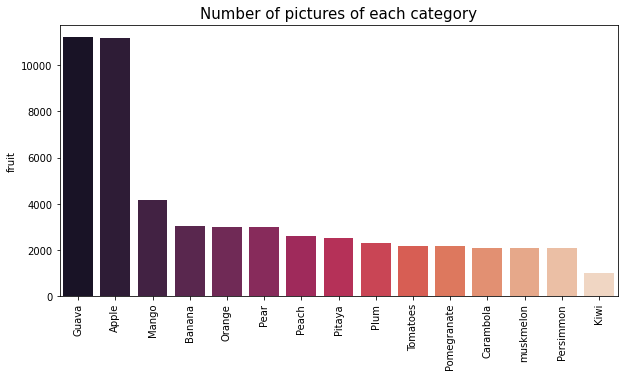

In [ ]:
# Display the number of pictures of each category
vc = df["fruit"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.xticks(rotation=90)
plt.show()

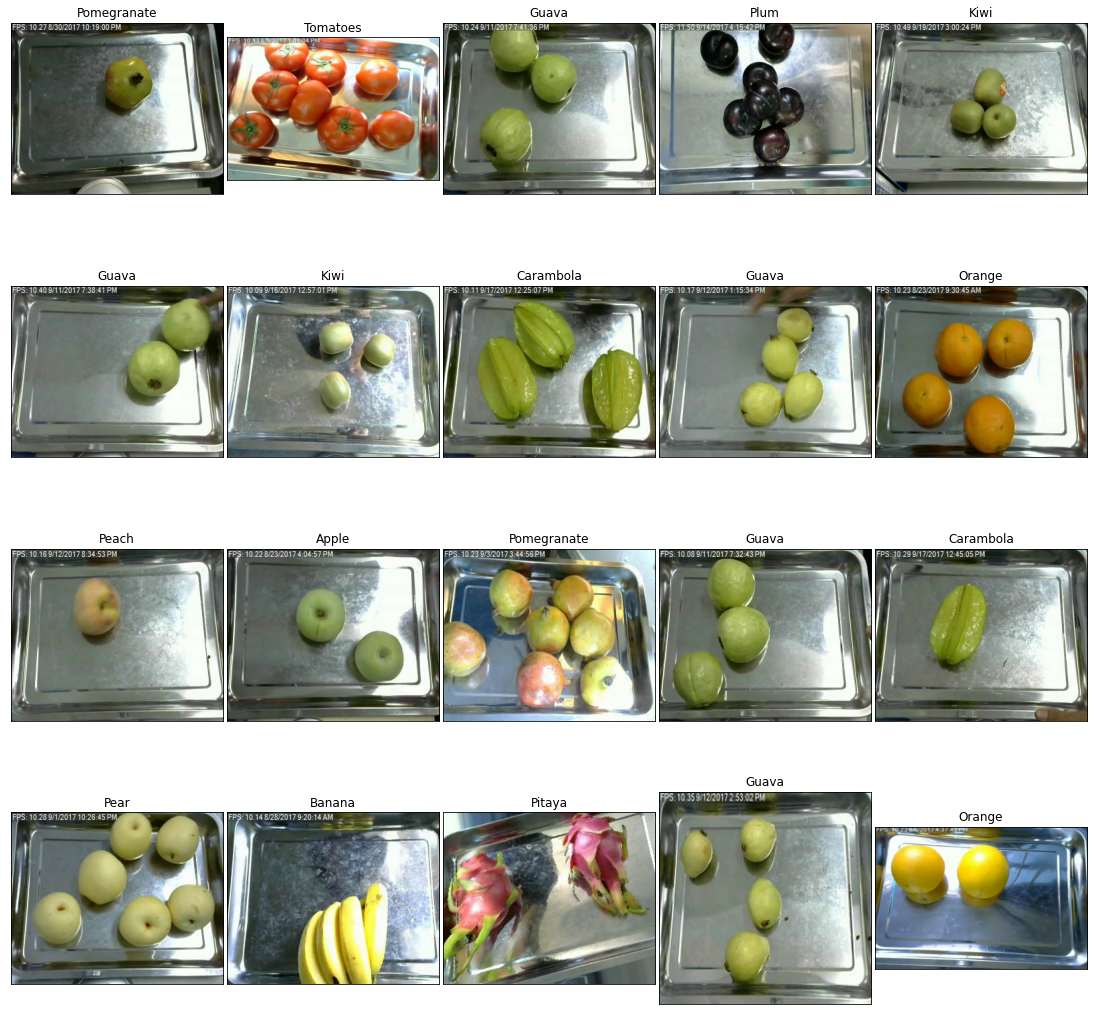

In [ ]:
# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.path[i]))
    ax.set_title(df.fruit[i], fontsize = 12)
plt.tight_layout(pad=0.0)
plt.show()

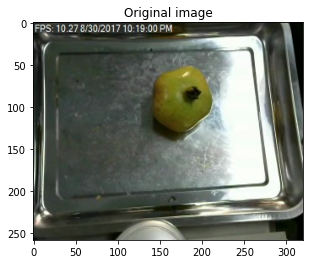

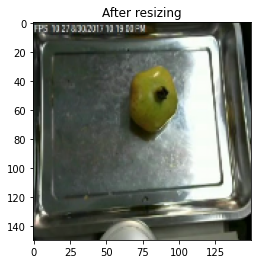

In [ ]:
# The pictures will be resized to have the same size for the neural network
img = plt.imread(df.path[0])
plt.imshow(img)
plt.title("Original image")
plt.show()

plt.imshow(cv2.resize(img, (150,150)))
plt.title("After resizing")
plt.show()

In [ ]:
def cut_df(df, number_of_parts, part):
# Return a part of the dataframe
# For example, if a dataframe has 10 rows and we want to return a part of them
# if it is cut in two, it will return the first 5 rows or the last 5 rows depending the part wanted

# Args:
#     df (pandas.DataFrame): The dataframe to cut a part of
#     number_of_parts (int): In how many parts should the dataframe be cut
#     part (int): The part of the dataframe to return

    if part < 1:
        print("Error, the part should be at least 1")
    elif part > number_of_parts:
        print("Error, the part cannot be higher than the number_of_parts")
        
    number_imgs_each_part = int(df.shape[0]/number_of_parts)
    idx1 = (part-1) * number_imgs_each_part
    idx2 = part * number_imgs_each_part
    return df.iloc[idx1:idx2]

In [ ]:
def load_img(df):
# Load the images using their contained in the dataframe df
# Return a list of images and a list with the labels of the images
    img_paths = df["path"].values
    img_labels = df["label"].values
    X = []
    y = []
    
    for i,path in enumerate(img_paths):
        img =  plt.imread(path)
        img = cv2.resize(img, (150,150))
        label = img_labels[i]
        X.append(img)
        y.append(label)
    return np.array(X),np.array(y)

In [ ]:
divisor = 5
x_train, y_train = load_img(cut_df(df,divisor,1))
y_train = to_categorical(y_train)

In [ ]:
x_test, y_test = load_img(cut_df(df, 20, 20))
y_test = to_categorical(y)

In [ ]:
(x_train, y_train), (x_test, y_test) = 